### Import packages and data

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [113]:
import warnings
warnings.filterwarnings(action='once')

In [77]:
nfl_df = pd.read_csv('NFL_Play_by_Play_2009-2018_(v5).csv')

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploratory data analysis

In [4]:
nfl_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [5]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


In [6]:
list(nfl_df.columns)

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [79]:
smaller_df = nfl_df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', \
                     'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', \
                     'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'drive', 'qtr', \
                     'down', 'ydstogo', 'play_type', 'home_timeouts_remaining', \
                     'away_timeouts_remaining', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', \
                     'total_away_score', 'posteam_score', 'defteam_score', 'score_differential']]

In [80]:
smaller_df['game_year'] = smaller_df['game_date'].str[:4]

<ipython-input-80-bf97b84152b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df['game_year'] = smaller_df['game_date'].str[:4]


In [9]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     449371 non-null  int64  
 1   game_id                     449371 non-null  int64  
 2   home_team                   449371 non-null  object 
 3   away_team                   449371 non-null  object 
 4   posteam                     436129 non-null  object 
 5   posteam_type                436492 non-null  object 
 6   defteam                     436492 non-null  object 
 7   side_of_field               448771 non-null  object 
 8   yardline_100                436301 non-null  float64
 9   game_date                   449371 non-null  object 
 10  quarter_seconds_remaining   449230 non-null  float64
 11  half_seconds_remaining      449206 non-null  float64
 12  game_seconds_remaining      449208 non-null  float64
 13  game_half     

In [10]:
num_games = len(set(smaller_df['game_id']))
print("The dataset contains details from " + str(num_games) + " games.")

The dataset contains details from 2526 games.


In [11]:
num_seasons = len(smaller_df.groupby('game_year').count()['play_id'])
num_plays = sum(smaller_df.groupby('game_year').count()['play_id'])
print("The dataset contains details from " + str(num_plays) + " plays.")
print("The dataset contains details from " + str(num_seasons) + " seasons.")

The dataset contains details from 449371 plays.
The dataset contains details from 10 seasons.


<AxesSubplot:xlabel='game_year'>

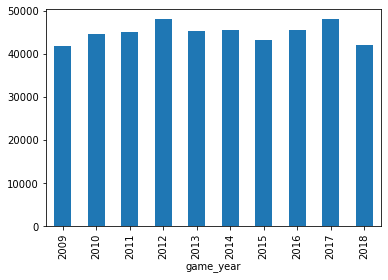

In [12]:
#Plotting the total number of plays per season
smaller_df.groupby('game_year').count()['play_id'].plot.bar()

In [13]:
smaller_df.groupby('play_type').count()['play_id']

play_type
extra_point     10934
field_goal       9777
kickoff         25552
no_play         42431
pass           186677
punt            23914
qb_kneel         3830
qb_spike          690
run            132692
Name: play_id, dtype: int64

<AxesSubplot:xlabel='play_type'>

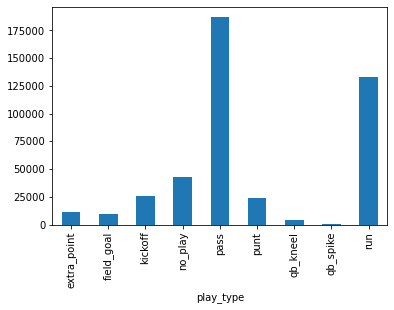

In [14]:
#Plotting the different types of plays
smaller_df.groupby('play_type').count()['play_id'].plot.bar()

In [81]:
#Creating a dataframe with only run or pass plays
run_pass = smaller_df[(smaller_df['play_type'] == 'run') | (smaller_df['play_type'] == 'pass')]

In [111]:
run_pass.corr()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,drive,qtr,down,ydstogo,home_timeouts_remaining,away_timeouts_remaining,posteam_timeouts_remaining,defteam_timeouts_remaining,total_away_score,posteam_score,defteam_score,score_differential,pass
play_id,1.000000,0.009500,-0.050401,-0.244398,-0.469192,-0.982690,0.962714,0.957394,0.033453,0.009424,-0.305029,-0.299733,-0.309635,-0.296070,0.690897,0.688234,0.705695,-0.063551,0.050039
game_id,0.009500,1.000000,-0.001145,-0.005604,-0.003438,-0.001918,-0.023817,0.000715,-0.005405,0.006390,0.012520,0.018633,0.015966,0.014812,0.004100,0.008983,0.018865,-0.009848,0.015950
yardline_100,-0.050401,-0.001145,1.000000,0.095057,0.103924,0.064608,-0.010244,-0.040847,-0.072919,0.232762,0.051044,0.043599,0.058857,0.034781,-0.024618,-0.021575,0.003395,-0.021847,0.026813
quarter_seconds_remaining,-0.244398,-0.005604,0.095057,1.000000,0.561179,0.271120,-0.224052,-0.010423,-0.038023,0.004223,0.321406,0.325314,0.347752,0.298258,-0.169367,-0.148842,-0.187823,0.046633,-0.078245
half_seconds_remaining,-0.469192,-0.003438,0.103924,0.561179,1.000000,0.509795,-0.434595,-0.378350,-0.042630,0.001298,0.473037,0.481228,0.493449,0.461411,-0.324799,-0.306684,-0.344721,0.056585,-0.092254
game_seconds_remaining,-0.982690,-0.001918,0.064608,0.271120,0.509795,1.000000,-0.941310,-0.962660,-0.038190,-0.003954,0.294966,0.295129,0.301672,0.289492,-0.670015,-0.668934,-0.686249,0.062090,-0.050390
drive,0.962714,-0.023817,-0.010244,-0.224052,-0.434595,-0.941310,1.000000,0.919500,0.017128,0.016492,-0.273507,-0.271871,-0.279336,-0.266979,0.656213,0.661604,0.672445,-0.055538,0.038118
qtr,0.957394,0.000715,-0.040847,-0.010423,-0.378350,-0.962660,0.919500,1.000000,0.029162,0.005387,-0.225835,-0.223867,-0.224991,-0.226045,0.651399,0.655770,0.661854,-0.050694,0.030558
down,0.033453,-0.005405,-0.072919,-0.038023,-0.042630,-0.038190,0.017128,0.029162,1.000000,-0.317478,-0.035211,-0.040776,-0.039666,-0.036580,0.008634,0.006639,0.010124,-0.003711,0.215880
ydstogo,0.009424,0.006390,0.232762,0.004223,0.001298,-0.003954,0.016492,0.005387,-0.317478,1.000000,0.001953,0.000292,-0.001686,0.004046,0.001424,-0.000010,0.015521,-0.014509,0.090061


<AxesSubplot:xlabel='qtr'>

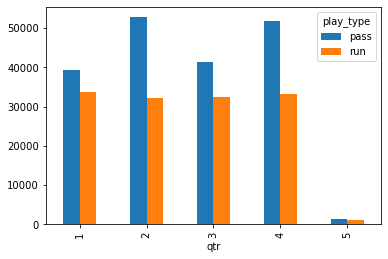

In [16]:
#Playcall by quarter
run_pass.groupby(['qtr', 'play_type',]).count()['play_id'].unstack().plot.bar()

<AxesSubplot:xlabel='down'>

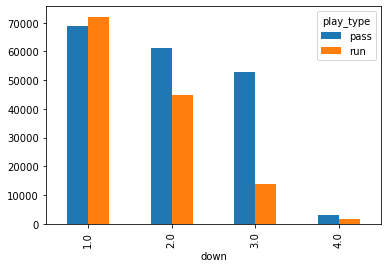

In [17]:
#Playcall by down
run_pass.groupby(['down', 'play_type',]).count()['play_id'].unstack().plot.bar()

In [18]:
#Adding column for if the team with the ball is ahead, behind, or tied
run_pass['lead'] = np.where(run_pass['score_differential']==0, 'tied', 0)
run_pass['lead'] = np.where(run_pass['score_differential']>0, 'ahead', run_pass['lead'])
run_pass['lead'] = np.where(run_pass['score_differential']<0, 'behind', run_pass['lead'])

<ipython-input-18-be6e236cf119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['lead'] = np.where(run_pass['score_differential']==0, 'tied', 0)
<ipython-input-18-be6e236cf119>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['lead'] = np.where(run_pass['score_differential']>0, 'ahead', run_pass['lead'])
<ipython-input-18-be6e236cf119>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [19]:
#Checking to make sure values updated
run_pass.groupby('lead').count()['play_id']

lead
ahead     110306
behind    149610
tied       59453
Name: play_id, dtype: int64

<AxesSubplot:xlabel='lead'>

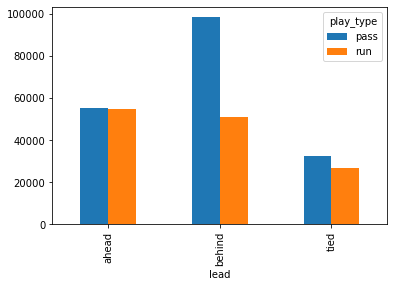

In [20]:
#Playcall by who is leading
run_pass.groupby(['lead', 'play_type',]).count()['play_id'].unstack().plot.bar()

<AxesSubplot:xlabel='game_year'>

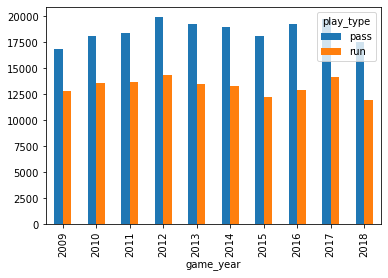

In [59]:
#Playcall by year
run_pass.groupby(['game_year', 'play_type',]).count()['play_id'].unstack().plot.bar()

In [64]:
run_pass_yr = run_pass.groupby(['game_year', 'play_type',]).count()['play_id'].unstack()

In [65]:
run_pass_yr['pass_percent'] = run_pass_yr['pass']/(run_pass_yr['pass']+run_pass_yr['run'])

In [66]:
run_pass_yr

play_type,pass,run,pass_percent
game_year,,,
2009,16900,12847,0.568125
2010,18134,13588,0.571654
2011,18428,13655,0.574385
2012,19915,14341,0.581358
2013,19249,13453,0.588618
2014,18944,13312,0.587302
2015,18148,12245,0.597111
2016,19241,12883,0.598960
2017,19702,14206,0.581043


In [67]:
#Playcall by team
run_pass.groupby(['posteam', 'play_type',]).count()['play_id'].unstack()

play_type,pass,run
posteam,,
ARI,6098,3714
ATL,6201,3946
BAL,5984,4274
BUF,5377,4457
CAR,5378,4549
CHI,5561,4056
CIN,5612,4282
CLE,5824,3968
DAL,5729,4162


<AxesSubplot:xlabel='posteam'>

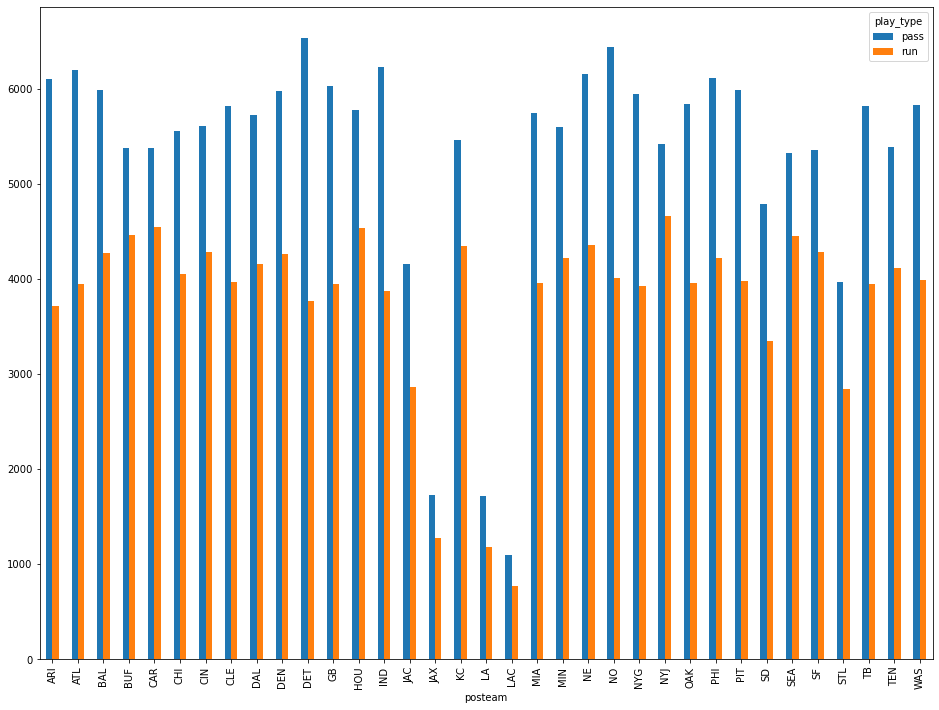

In [70]:
#Playcall by team
run_pass.groupby(['posteam', 'play_type',]).count()['play_id'].unstack().plot.bar(figsize=(16,12))

### Data cleaning

In [21]:
run_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319369 entries, 1 to 449368
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     319369 non-null  int64  
 1   game_id                     319369 non-null  int64  
 2   home_team                   319369 non-null  object 
 3   away_team                   319369 non-null  object 
 4   posteam                     319369 non-null  object 
 5   posteam_type                319369 non-null  object 
 6   defteam                     319369 non-null  object 
 7   side_of_field               319369 non-null  object 
 8   yardline_100                319369 non-null  float64
 9   game_date                   319369 non-null  object 
 10  quarter_seconds_remaining   319369 non-null  float64
 11  half_seconds_remaining      319352 non-null  float64
 12  game_seconds_remaining      319355 non-null  float64
 13  game_half     

Since there are only a few missing values (half_seconds_remaining, game_seconds_remaining, down), it is okay to drop these values without affecting our analysis.

In [82]:
run_pass.dropna(inplace = True)

<ipython-input-82-e05c900ed3d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass.dropna(inplace = True)


In [23]:
run_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318668 entries, 1 to 449368
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     318668 non-null  int64  
 1   game_id                     318668 non-null  int64  
 2   home_team                   318668 non-null  object 
 3   away_team                   318668 non-null  object 
 4   posteam                     318668 non-null  object 
 5   posteam_type                318668 non-null  object 
 6   defteam                     318668 non-null  object 
 7   side_of_field               318668 non-null  object 
 8   yardline_100                318668 non-null  float64
 9   game_date                   318668 non-null  object 
 10  quarter_seconds_remaining   318668 non-null  float64
 11  half_seconds_remaining      318668 non-null  float64
 12  game_seconds_remaining      318668 non-null  float64
 13  game_half     

In [83]:
conditions = [run_pass['home_team'] == 'JAC', run_pass['home_team'] == 'STL', run_pass['home_team'] == 'SD']

choices = ['JAX', 'LA', 'LAC']

run_pass['home_team'] = np.select(conditions, choices, default = run_pass['home_team'])

<ipython-input-83-ba1333f0e124>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['home_team'] = np.select(conditions, choices, default = run_pass['home_team'])


In [84]:
conditions = [run_pass['away_team'] == 'JAC', run_pass['away_team'] == 'STL', run_pass['away_team'] == 'SD']

choices = ['JAX', 'LA', 'LAC']

run_pass['away_team'] = np.select(conditions, choices, default = run_pass['away_team'])

<ipython-input-84-a010c62afb24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['away_team'] = np.select(conditions, choices, default = run_pass['away_team'])


In [85]:
conditions = [run_pass['posteam'] == 'JAC', run_pass['posteam'] == 'STL', run_pass['posteam'] == 'SD']

choices = ['JAX', 'LA', 'LAC']

run_pass['posteam'] = np.select(conditions, choices, default = run_pass['posteam'])

<ipython-input-85-d46f30cd2c0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['posteam'] = np.select(conditions, choices, default = run_pass['posteam'])


In [86]:
conditions = [run_pass['defteam'] == 'JAC', run_pass['defteam'] == 'STL', run_pass['defteam'] == 'SD']

choices = ['JAX', 'LA', 'LAC']

run_pass['defteam'] = np.select(conditions, choices, default = run_pass['defteam'])

<ipython-input-86-1ec238a3c3d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['defteam'] = np.select(conditions, choices, default = run_pass['defteam'])


### Preparing data for first simple models

In [87]:
#defining run play as 0 and pass play as 1
run_pass['pass'] = np.where(run_pass['play_type']=='pass', 1, 0)

<ipython-input-87-1a17f77d415f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['pass'] = np.where(run_pass['play_type']=='pass', 1, 0)


In [88]:
#picking features for simple model
numeric_features = ['yardline_100', 'quarter_seconds_remaining', 'half_seconds_remaining', \
                    'game_seconds_remaining', 'drive', 'qtr', 'down', 'ydstogo', \
                    'posteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'score_differential']

In [89]:
X = run_pass[numeric_features]

In [90]:
y = run_pass['pass']

In [91]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

### Building dummy model

In [92]:
#dummy model
dummy_model = DummyClassifier(strategy="most_frequent")

In [93]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

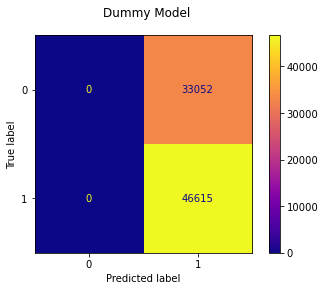

In [94]:
#confusion matrix for test data
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_test, y_test, ax=ax, cmap="plasma");

In [95]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dummy_model.predict(X_test))

0.5851230747988502

In [96]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, dummy_model.predict(X_test))

0.5851230747988502

In [97]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test, dummy_model.predict(X_test))

1.0

In [98]:
#f1
from sklearn.metrics import f1_score
f1_score(y_test, dummy_model.predict(X_test))

0.7382683201089625

### Building a simple logistic regression model

In [99]:
simple_logreg_model = LogisticRegression(random_state=2021, penalty='none', max_iter = 500)

In [100]:
simple_logreg_model.fit(X_train, y_train)

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, penalty='none', random_state=2021)

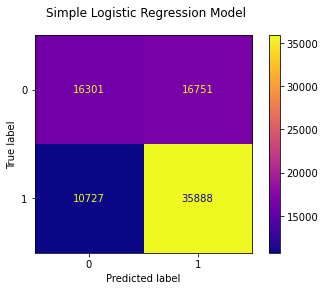

In [101]:
#confusion matrix for test data
fig, ax = plt.subplots()

fig.suptitle("Simple Logistic Regression Model")

plot_confusion_matrix(simple_logreg_model, X_test, y_test, ax=ax, cmap="plasma");

In [102]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, simple_logreg_model.predict(X_test))

0.6550893092497521

In [103]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, simple_logreg_model.predict(X_test))

0.681775869602386

In [104]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test, simple_logreg_model.predict(X_test))

0.769880939611713

In [105]:
#f1
from sklearn.metrics import f1_score
f1_score(y_test, simple_logreg_model.predict(X_test))

0.7231547343180122

### Feature engineering

In [106]:
run_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318668 entries, 1 to 449368
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     318668 non-null  int64  
 1   game_id                     318668 non-null  int64  
 2   home_team                   318668 non-null  object 
 3   away_team                   318668 non-null  object 
 4   posteam                     318668 non-null  object 
 5   posteam_type                318668 non-null  object 
 6   defteam                     318668 non-null  object 
 7   side_of_field               318668 non-null  object 
 8   yardline_100                318668 non-null  float64
 9   game_date                   318668 non-null  object 
 10  quarter_seconds_remaining   318668 non-null  float64
 11  half_seconds_remaining      318668 non-null  float64
 12  game_seconds_remaining      318668 non-null  float64
 13  game_half     

In [112]:
#Adding feature if team is in the red zone
run_pass['red_zone'] = np.where(run_pass['yardline_100']<=20, 1, 0)

<ipython-input-112-f44b5c67df69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['red_zone'] = np.where(run_pass['yardline_100']<=20, 1, 0)


In [114]:
#Adding feature for two minute drill
run_pass['two_min'] = np.where(run_pass['half_seconds_remaining']<=120, 1, 0)

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-114-be7f581d9452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_pass['two_min'] = np.where(run_pass['half_seconds_remaining']<=120, 1, 0)


In [117]:
run_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318668 entries, 1 to 449368
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     318668 non-null  int64  
 1   game_id                     318668 non-null  int64  
 2   home_team                   318668 non-null  object 
 3   away_team                   318668 non-null  object 
 4   posteam                     318668 non-null  object 
 5   posteam_type                318668 non-null  object 
 6   defteam                     318668 non-null  object 
 7   side_of_field               318668 non-null  object 
 8   yardline_100                318668 non-null  float64
 9   game_date                   318668 non-null  object 
 10  quarter_seconds_remaining   318668 non-null  float64
 11  half_seconds_remaining      318668 non-null  float64
 12  game_seconds_remaining      318668 non-null  float64
 13  game_half     

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
rp_df = pd.get_dummies(run_pass, columns = ['qtr', 'down', 'posteam'], drop_first = True)

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
rp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318668 entries, 1 to 449368
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     318668 non-null  int64  
 1   game_id                     318668 non-null  int64  
 2   home_team                   318668 non-null  object 
 3   away_team                   318668 non-null  object 
 4   posteam_type                318668 non-null  object 
 5   defteam                     318668 non-null  object 
 6   side_of_field               318668 non-null  object 
 7   yardline_100                318668 non-null  float64
 8   game_date                   318668 non-null  object 
 9   quarter_seconds_remaining   318668 non-null  float64
 10  half_seconds_remaining      318668 non-null  float64
 11  game_seconds_remaining      318668 non-null  float64
 12  game_half                   318668 non-null  object 
 13  drive         

In [122]:
X = rp_df.drop(columns = ['play_id', 'game_id', 'home_team', 'away_team', 'posteam_type', 'defteam', \
                         'side_of_field', 'game_date', 'game_half', 'play_type', 'home_timeouts_remaining', \
                         'away_timeouts_remaining', 'defteam_timeouts_remaining', 'total_away_score', \
                          'game_year', 'pass'])

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
y = rp_df['pass']

In [124]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

In [125]:
names = ['Logistic Regression', 'Random Forest', 'Decision Tree']

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
classifiers = [LogisticRegression(random_state=2021, penalty='none', max_iter = 500), 
              RandomForestClassifier(max_depth = 5, n_estimators = 100),
              DecisionTreeClassifier(max_depth = 5)]

In [131]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
scores

/Users/jameshodgens/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.654009815858511, 0.647959631968067, 0.6607629256781352]